In [1]:
import os
import re
import random
from datetime import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
import dask.dataframe as dd

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
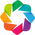

In [32]:
import holoviews as hv
from holoviews import opts
from holoviews.element.tiles import StamenTerrain
hv.extension('bokeh')
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9
import colorcet as cc


from datashader.utils import export_image

Greys9_r = list(reversed(Greys9))[:-2]

import plotly.express as px

import imageio.v3 as iio
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

In [3]:
df = pd.read_feather('/Users/juan/Library/CloudStorage/Box-Box/ComEd Data/feather/202002_full.feather')
df['INTERVAL_READING_DATE'] = pd.to_datetime(df['INTERVAL_READING_DATE'] ,format='%Y/%m/%d')
df['ZIP_CODE'] = df['ZIP_CODE'].astype(int) 
df['residential'] = np.where(df.DELIVERY_SERVICE_NAME.str.contains('RESIDENTIAL'), 1, 0)

In [4]:
hour_cols = ['INTERVAL_HR0030_ENERGY_QTY', 
                    'INTERVAL_HR0100_ENERGY_QTY', 'INTERVAL_HR0130_ENERGY_QTY',
                    'INTERVAL_HR0200_ENERGY_QTY', 'INTERVAL_HR0230_ENERGY_QTY',
                    'INTERVAL_HR0300_ENERGY_QTY', 'INTERVAL_HR0330_ENERGY_QTY',
                    'INTERVAL_HR0400_ENERGY_QTY', 'INTERVAL_HR0430_ENERGY_QTY',
                    'INTERVAL_HR0500_ENERGY_QTY', 'INTERVAL_HR0530_ENERGY_QTY',
                    'INTERVAL_HR0600_ENERGY_QTY', 'INTERVAL_HR0630_ENERGY_QTY',
                    'INTERVAL_HR0700_ENERGY_QTY', 'INTERVAL_HR0730_ENERGY_QTY',
                    'INTERVAL_HR0800_ENERGY_QTY', 'INTERVAL_HR0830_ENERGY_QTY',
                    'INTERVAL_HR0900_ENERGY_QTY', 'INTERVAL_HR0930_ENERGY_QTY',
                    'INTERVAL_HR1000_ENERGY_QTY', 'INTERVAL_HR1030_ENERGY_QTY',
                    'INTERVAL_HR1100_ENERGY_QTY', 'INTERVAL_HR1130_ENERGY_QTY',
                    'INTERVAL_HR1200_ENERGY_QTY', 'INTERVAL_HR1230_ENERGY_QTY',
                    'INTERVAL_HR1300_ENERGY_QTY', 'INTERVAL_HR1330_ENERGY_QTY',
                    'INTERVAL_HR1400_ENERGY_QTY', 'INTERVAL_HR1430_ENERGY_QTY',
                    'INTERVAL_HR1500_ENERGY_QTY', 'INTERVAL_HR1530_ENERGY_QTY',
                    'INTERVAL_HR1600_ENERGY_QTY', 'INTERVAL_HR1630_ENERGY_QTY',
                    'INTERVAL_HR1700_ENERGY_QTY', 'INTERVAL_HR1730_ENERGY_QTY',
                    'INTERVAL_HR1800_ENERGY_QTY', 'INTERVAL_HR1830_ENERGY_QTY',
                    'INTERVAL_HR1900_ENERGY_QTY', 'INTERVAL_HR1930_ENERGY_QTY',
                    'INTERVAL_HR2000_ENERGY_QTY', 'INTERVAL_HR2030_ENERGY_QTY',
                    'INTERVAL_HR2100_ENERGY_QTY', 'INTERVAL_HR2130_ENERGY_QTY',
                    'INTERVAL_HR2200_ENERGY_QTY', 'INTERVAL_HR2230_ENERGY_QTY',
                    'INTERVAL_HR2300_ENERGY_QTY', 'INTERVAL_HR2330_ENERGY_QTY',
                    'INTERVAL_HR0000_ENERGY_QTY']

In [5]:
df_agg = df.groupby('INTERVAL_READING_DATE')[hour_cols].sum().reset_index()

In [6]:
df_agg = df_agg.melt(
        id_vars=["INTERVAL_READING_DATE"],
        var_name="Time",
        value_name="energy").sort_values(["INTERVAL_READING_DATE", 'Time']).reset_index()

In [7]:
zipcodes = df.ZIP_CODE.unique()
df_land_z = gpd.read_file('../data/geo/landuse_zc.geojson')
df_land_z['zip5'] = df_land_z.zip5.astype(int)

In [26]:
i = 0
N = len(zipcodes)
df_points = pd.DataFrame()
for zipcode in zipcodes:
    i += 1
    print(f'{i}/{N}')
    df_i = df[df.ZIP_CODE==zipcode].groupby(['ACCOUNT_IDENTIFIER', 'residential']).ZIP_CODE.first().reset_index()
    df_assings = pd.merge(df_i, df_land_z[['id', 'zip5', 'residential']], 
                                                left_on=['ZIP_CODE', 'residential'], right_on=['zip5', 'residential'])
    df_assings = df_assings.sample(frac=1).reset_index(drop=True)
    df_assings = df_assings.groupby('ACCOUNT_IDENTIFIER').id.first().reset_index()
    df_points = pd.concat([df_points, df_assings])

1/432
2/432
3/432
4/432
5/432
6/432
7/432
8/432
9/432
10/432
11/432
12/432
13/432
14/432
15/432
16/432
17/432
18/432
19/432
20/432
21/432
22/432
23/432
24/432
25/432
26/432
27/432
28/432
29/432
30/432
31/432
32/432
33/432
34/432
35/432
36/432
37/432
38/432
39/432
40/432
41/432
42/432
43/432
44/432
45/432
46/432
47/432
48/432
49/432
50/432
51/432
52/432
53/432
54/432
55/432
56/432
57/432
58/432
59/432
60/432
61/432
62/432
63/432
64/432
65/432
66/432
67/432
68/432
69/432
70/432
71/432
72/432
73/432
74/432
75/432
76/432
77/432
78/432
79/432
80/432
81/432
82/432
83/432
84/432
85/432
86/432
87/432
88/432
89/432
90/432
91/432
92/432
93/432
94/432
95/432
96/432
97/432
98/432
99/432
100/432
101/432
102/432
103/432
104/432
105/432
106/432
107/432
108/432
109/432
110/432
111/432
112/432
113/432
114/432
115/432
116/432
117/432
118/432
119/432
120/432
121/432
122/432
123/432
124/432
125/432
126/432
127/432
128/432
129/432
130/432
131/432
132/432
133/432
134/432
135/432
136/432
137/432
138/432
139/

In [10]:
df = dd.read_parquet('../data/comed_day/2020_01_29.parquet')

#df['date_time'] = '02/19/2020 ' + df.Time
df['date_time'] = dd.to_datetime(df.date_time ,format='%m/%d/%Y %H%M')
df['residential'] = 1
df['residential'] = df.residential.where(df.service_name.str.contains('RESIDENTIAL'), 0)

df_points = dd.from_pandas(pd.DataFrame(), npartitions=2)
i = 0
N = len(zipcodes)
for zipcode in zipcodes:
    i += 1
    print(f'{i}/{N}')
    df_i = df[df.ZIP_CODE==zipcode].groupby(['n_acc', 'residential']).ZIP_CODE.first().reset_index()
    df_assings = dd.merge(df_i, df_land_z[['id', 'zip5', 'residential']], 
                                                left_on=['ZIP_CODE', 'residential'], right_on=['zip5', 'residential'])
    df_assings = df_assings.sample(frac=1).reset_index(drop=True)
    df_assings = df_assings.groupby('n_acc').id.first().reset_index()
    df_points = dd.concat([df_points, df_assings])
    
    

1/485
2/485
3/485
4/485
5/485
6/485
7/485
8/485
9/485
10/485
11/485
12/485
13/485
14/485
15/485
16/485
17/485
18/485
19/485
20/485
21/485
22/485
23/485
24/485
25/485
26/485
27/485
28/485
29/485
30/485
31/485
32/485
33/485
34/485
35/485
36/485
37/485
38/485
39/485
40/485
41/485
42/485
43/485
44/485
45/485
46/485
47/485
48/485
49/485
50/485
51/485
52/485
53/485
54/485
55/485
56/485
57/485
58/485
59/485
60/485
61/485
62/485
63/485
64/485
65/485
66/485
67/485
68/485
69/485
70/485
71/485
72/485
73/485
74/485
75/485
76/485
77/485
78/485
79/485
80/485
81/485
82/485
83/485
84/485
85/485
86/485
87/485
88/485
89/485
90/485
91/485
92/485
93/485
94/485
95/485
96/485
97/485
98/485
99/485
100/485
101/485
102/485
103/485
104/485
105/485
106/485
107/485
108/485
109/485
110/485
111/485
112/485
113/485
114/485
115/485
116/485
117/485
118/485
119/485
120/485
121/485
122/485
123/485
124/485
125/485
126/485
127/485
128/485
129/485
130/485
131/485
132/485
133/485
134/485
135/485
136/485
137/485
138/485
139/

In [30]:
df_points.to_feather('../data/geo/points_accounts.feather')

In [260]:
df_points = pd.read_feather('../data/geo/points_accounts.feather')

In [261]:
df_land_z['x'] = df_land_z.geometry.centroid.x
df_land_z['y'] = df_land_z.geometry.centroid.y

/var/folders/dk/gqlhh1p50lq41knjj1bn1blc0000gn/T/ipykernel_64578/1651927857.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_land_z['x'] = df_land_z.geometry.centroid.x
/var/folders/dk/gqlhh1p50lq41knjj1bn1blc0000gn/T/ipykernel_64578/1651927857.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_land_z['y'] = df_land_z.geometry.centroid.y


In [34]:
df_accs_points = pd.merge(df_points, df_land_z, on='id')[['ACCOUNT_IDENTIFIER', 'residential', 'x', 'y']]
df_accs_points.to_feather('../data/geo/accounts_coordinates.feather')

In [7]:
df_accs_points = pd.read_feather('../data/geo/accounts_coordinates.feather')

In [14]:
hour_cols = ['INTERVAL_HR0030_ENERGY_QTY', 
                    'INTERVAL_HR0100_ENERGY_QTY', 'INTERVAL_HR0130_ENERGY_QTY',
                    'INTERVAL_HR0200_ENERGY_QTY', 'INTERVAL_HR0230_ENERGY_QTY',
                    'INTERVAL_HR0300_ENERGY_QTY', 'INTERVAL_HR0330_ENERGY_QTY',
                    'INTERVAL_HR0400_ENERGY_QTY', 'INTERVAL_HR0430_ENERGY_QTY',
                    'INTERVAL_HR0500_ENERGY_QTY', 'INTERVAL_HR0530_ENERGY_QTY',
                    'INTERVAL_HR0600_ENERGY_QTY', 'INTERVAL_HR0630_ENERGY_QTY',
                    'INTERVAL_HR0700_ENERGY_QTY', 'INTERVAL_HR0730_ENERGY_QTY',
                    'INTERVAL_HR0800_ENERGY_QTY', 'INTERVAL_HR0830_ENERGY_QTY',
                    'INTERVAL_HR0900_ENERGY_QTY', 'INTERVAL_HR0930_ENERGY_QTY',
                    'INTERVAL_HR1000_ENERGY_QTY', 'INTERVAL_HR1030_ENERGY_QTY',
                    'INTERVAL_HR1100_ENERGY_QTY', 'INTERVAL_HR1130_ENERGY_QTY',
                    'INTERVAL_HR1200_ENERGY_QTY', 'INTERVAL_HR1230_ENERGY_QTY',
                    'INTERVAL_HR1300_ENERGY_QTY', 'INTERVAL_HR1330_ENERGY_QTY',
                    'INTERVAL_HR1400_ENERGY_QTY', 'INTERVAL_HR1430_ENERGY_QTY',
                    'INTERVAL_HR1500_ENERGY_QTY', 'INTERVAL_HR1530_ENERGY_QTY',
                    'INTERVAL_HR1600_ENERGY_QTY', 'INTERVAL_HR1630_ENERGY_QTY',
                    'INTERVAL_HR1700_ENERGY_QTY', 'INTERVAL_HR1730_ENERGY_QTY',
                    'INTERVAL_HR1800_ENERGY_QTY', 'INTERVAL_HR1830_ENERGY_QTY',
                    'INTERVAL_HR1900_ENERGY_QTY', 'INTERVAL_HR1930_ENERGY_QTY',
                    'INTERVAL_HR2000_ENERGY_QTY', 'INTERVAL_HR2030_ENERGY_QTY',
                    'INTERVAL_HR2100_ENERGY_QTY', 'INTERVAL_HR2130_ENERGY_QTY',
                    'INTERVAL_HR2200_ENERGY_QTY', 'INTERVAL_HR2230_ENERGY_QTY',
                    'INTERVAL_HR2300_ENERGY_QTY', 'INTERVAL_HR2330_ENERGY_QTY',
                    'INTERVAL_HR0000_ENERGY_QTY']
all_days = df.INTERVAL_READING_DATE.dt.day.unique()
#df['MAX_ENERGY'] = df[hour_cols].max(axis=1)
df_max = df.groupby('ACCOUNT_IDENTIFIER')[hour_cols].max().max(axis=1).reset_index()
df_max = df_max.rename(columns={0: 'MAX_ENERGY'})
df = pd.merge(df, df_max, on='ACCOUNT_IDENTIFIER')

In [17]:
max_range = 0.7
min_range = 0.6

plot_width  = int(1200)
plot_height = int(plot_width//1.2)

for day in all_days:
    for hour_col in hour_cols:
        #df_i = df[(df.INTERVAL_READING_DATE.dt.day==day) & (df.residential==1)].sort_values('ZIP_CODE').reset_index()
        df_i = df[(df.INTERVAL_READING_DATE.dt.day==day)].sort_values('ZIP_CODE').reset_index()
        date_str = datetime.strftime(df_i['INTERVAL_READING_DATE'][0].date(), '%m-%d-%Y')
        time_str = re.search(r'INTERVAL_HR(.*?)_ENERGY_QTY', hour_col)[1]
        df_i = df_i[['ACCOUNT_IDENTIFIER', hour_col, 'MAX_ENERGY']]
        df_i['NORM_ENERGY'] = df_i[hour_col] / df_i['MAX_ENERGY'] 
        df_i = df_i[['ACCOUNT_IDENTIFIER', 'NORM_ENERGY']]
        df_i = pd.merge(df_i, df_accs_points, on='ACCOUNT_IDENTIFIER')
        
        cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height)
        agg = cvs.points(df_i, 'x', 'y', ds.mean('NORM_ENERGY'))
        img = tf.shade(agg, cmap=cc.gray, how='log', span=[min_range ,max_range])
        export_image(img=img, filename=f'{date_str}_{time_str}', fmt=".png", export_path='../outputs/datashader/images_gray/')

In [266]:
max_range = 0.7
min_range = 0.6

plot_width  = int(1200)
plot_height = int(plot_width//1.2)

for day in all_days:
    for hour_col in hour_cols:
        df_i = df[(df.INTERVAL_READING_DATE.dt.day==day) & (df.residential==0)].sort_values('ZIP_CODE').reset_index()
        date_str = datetime.strftime(df_i['INTERVAL_READING_DATE'][0].date(), '%m-%d-%Y')
        time_str = re.search(r'INTERVAL_HR(.*?)_ENERGY_QTY', hour_col)[1]
        df_i = df_i[['ACCOUNT_IDENTIFIER', hour_col, 'MAX_ENERGY']]
        df_i['NORM_ENERGY'] = df_i[hour_col] / df_i['MAX_ENERGY'] 
        df_i = df_i[['ACCOUNT_IDENTIFIER', 'NORM_ENERGY']]
        df_i = pd.merge(df_i, df_accs_points, on='ACCOUNT_IDENTIFIER')
        
        
        cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height)
        agg = cvs.points(df_i, 'x', 'y', ds.mean('NORM_ENERGY'))
        img = tf.shade(agg, cmap=cc.kbc, how='log', span=[min_range ,max_range])
        export_image(img=img, filename=f'{date_str}_{time_str}', fmt=".png", export_path='../outputs/datashader/images_comm/')

In [18]:
from skimage import filters
from skimage.color import rgb2gray  # only needed for incorrectly saved images
from skimage.measure import regionprops, centroid
from skimage.color import label2rgb

In [31]:
filenames = os.listdir('../outputs/datashader/images_gray')
filenames = [i for i in filenames if '.png' in i]
filenames.sort()


images = []
breath_x = []
breath_y = []
day_time = []
traces = []

for i in range(0, len(filenames)):
    background = Image.open(f"../outputs/datashader/images_gray/{filenames[i]}")
    black = Image.new("RGB", background.size, "BLACK")
    black.paste(background, (0, 0), background)  
    #overlay = Image.open(f"../outputs/datashader/images_comm/{filenames[i]}")
    #background = background.convert("RGB")
    #overlay = overlay.convert("RGB")

    #new_img = Image.blend(black, background, 0.5)
    #new_img = Image.blend(black, overlay, 0.5)
    new_img = black
    
    image = rgb2gray(new_img)
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid
    center_of_mass = centroid(image)

    traces.append(center_of_mass)

    draw = ImageDraw.Draw(new_img)
    font = ImageFont.truetype(font='../env/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf', size=30)
    displ_time = datetime.strftime(datetime.strptime(filenames[i],'%m-%d-%Y_%H%M.png'), '%A, %H:%M')
    draw.text((50, 900),displ_time,(255,255,255), font=font)
    
    if len(traces) > 12:
        traces.pop(0)
    
    for trace in traces:
        #draw.text((breath_x[i], breath_y[i]),'X',(255,8,0), font=font)
        cm_x = trace[1]
        cm_y = trace[0]
        draw.ellipse(((cm_x-2, cm_y-2), (cm_x+2, cm_y+2)), fill=(0,164,250))
    images.append(new_img)
    
    breath_x.append(center_of_mass[1])
    breath_y.append(center_of_mass[0])
    day_time.append(displ_time)
    

    new_img.save(f"../outputs/datashader/images_overlay/CM_{filenames[i]}","PNG")
    

In [39]:
df = pd.DataFrame({'long': breath_x, 'lat': breath_y, 'day_time': day_time})

In [46]:
fig = px.line(df, x=df.index, y=df.long, markers=True, hover_data='day_time')
fig.update_traces(line_color='#6E00FF')
fig.show()

In [48]:
fig = px.line(df, x=df.index, y=df.lat, markers=True, hover_data='day_time')
fig.update_traces(line_color='#408050')
fig.show()

In [35]:
fig = px.line(df_agg.reset_index(), x=df_agg.index, y='energy', markers=True, hover_data='Time')
fig.show()

In [17]:
image = imageio.imread("../outputs/datashader/images_overlay/02-09-2020_2100.png")[:,:,:3]
threshold_value = filters.threshold_otsu(image)
labeled_foreground = (image > threshold_value).astype(int)
properties = regionprops(labeled_foreground, image)
center_of_mass = properties[0].centroid
weighted_center_of_mass = properties[0].weighted_centroid
colorized = label2rgb(labeled_foreground, image, colors=['black', 'red'], alpha=0.1)
colorized.save(f"../outputs/datashader/test","jpeg")

/var/folders/dk/gqlhh1p50lq41knjj1bn1blc0000gn/T/ipykernel_48969/2287843072.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread("../outputs/datashader/images_overlay/02-09-2020_2100.png")[:,:,:3]
/var/folders/dk/gqlhh1p50lq41knjj1bn1blc0000gn/T/ipykernel_48969/2287843072.py:2: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (1000, 1200, 3) looks like that of an RGB image.
  threshold_value = filters.threshold_otsu(image)


AttributeError: 'numpy.ndarray' object has no attribute 'save'

In [ ]:
new_img

In [49]:
images[0].save('../outputs/datashader/movies/Chicago_Jan_2020_week_CM.gif',
               save_all=True,
               format='GIF',
               append_images=images[1:],
               duration=120,disposal=2,
               loop=1000)